In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [6]:
df=pd.read_csv("zomato.csv",encoding="latin-1")

In [43]:
df.sample(1)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
6087,17989108,Dinesh Ka Mithila Dhaba,1,New Delhi,"Main Road, Mahavir Enclave Part 3, Palam, New ...",Palam,"Palam, New Delhi",77.068836,28.60297,North Indian,...,Indian Rupees(Rs.),No,No,No,No,1,0.0,White,Not rated,0


Press m to make makedown and y to revert

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [9]:
df.describe()

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,9.551000e+03,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,9.051128e+06,18.365616,64.126574,25.854381,1199.210763,1.804837,2.666370,156.909748
std,8.791521e+06,56.750546,41.467058,11.007935,16121.183073,0.905609,1.516378,430.169145
min,5.300000e+01,1.000000,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000
25%,3.019625e+05,1.000000,77.081343,28.478713,250.000000,1.000000,2.500000,5.000000
50%,6.004089e+06,1.000000,77.191964,28.570469,400.000000,2.000000,3.200000,31.000000
75%,1.835229e+07,1.000000,77.282006,28.642758,700.000000,2.000000,3.700000,131.000000
max,1.850065e+07,216.000000,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000


In [33]:
df.columns[df.dtypes =='int64']

Index(['Restaurant ID', 'Country Code', 'Average Cost for two', 'Price range',
       'Votes'],
      dtype='object')

In [36]:
dfbox=df[['Restaurant ID', 'Country Code', 'Average Cost for two', 'Price range',
       'Votes']]

,Restaurant ID,Country Code,Average Cost for two,Price range,Votes
0,6317637,162,1100,3,314
1,6304287,162,1200,3,591
2,6300002,162,4000,4,270
3,6318506,162,1500,4,365
4,6314302,162,1500,4,229
...,...,...,...,...,...
9546,5915730,208,80,3,788
9547,5908749,208,105,3,1034
9548,5915807,208,170,4,661
9549,5916112,208,120,4,901


In [41]:
df.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [57]:
[features for features in df.columns if df[features].isnull().sum()>0]

['Cuisines']

In [52]:
[features for features in df.columns if df[features].isnull().sum()>2]

['Cuisines']

In [58]:
df.shape

(9551, 21)

<AxesSubplot:>

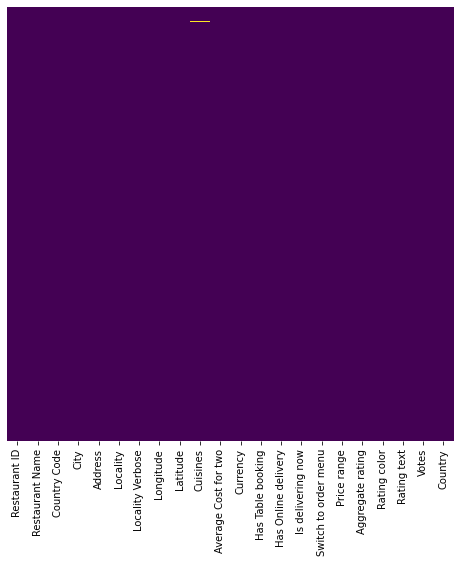

In [159]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [60]:
df_country=pd.read_excel("Country-Code.xlsx")

In [64]:
df_country.sample(1)

,Country Code,Country
9,189,South Africa


In [65]:
df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [68]:
df=pd.merge(df,df_country,on='Country Code',how='left')

In [69]:
df.sample(3)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
3757,304635,Nutritious Nation,1,New Delhi,"M-45, Main Market, Ground Floor, Greater Kaila...",Greater Kailash (GK) 2,"Greater Kailash (GK) 2, New Delhi",77.242529,28.533764,"Healthy Food, Continental, Juices, Salad",...,No,Yes,No,No,2,3.5,Yellow,Good,352,India
9082,1226,Pind Balluchi,1,Noida,"The Great India Place Mall, Sector 38-A, Near ...","The Great India Place, Sector 38","The Great India Place, Sector 38, Noida",77.325398,28.567159,"North Indian, Mughlai",...,Yes,Yes,No,No,2,3.3,Orange,Average,793,India
8187,18441551,Joost Juice Bar,1,Noida,"Lowe Ground Floor, Logix City Centre, Sector 3...","Logix City Centre, Sector 32, Noida","Logix City Centre, Sector 32, Noida, Noida",77.353708,28.574358,Beverages,...,No,No,No,No,1,0.0,White,Not rated,1,India


In [70]:
df.shape

(9551, 22)

<AxesSubplot:xlabel='Aggregate rating', ylabel='City'>

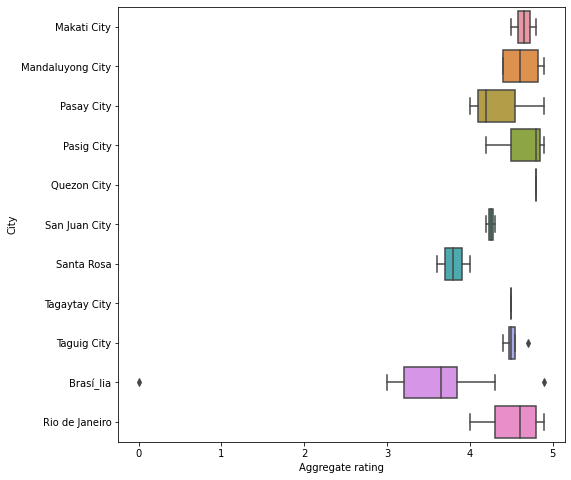

In [158]:
sns.boxplot(x="Aggregate rating",y="City",data=df[:55])

In [102]:
df["City"].value_counts().idxmax()

'New Delhi'

In [108]:
df["City"].value_counts()[0:5]

New Delhi    5473
Gurgaon      1118
Noida        1080
Faridabad     251
Ghaziabad      25
Name: City, dtype: int64

In [110]:
df.iloc[df["City"].value_counts()[0:5]]

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
5473,309704,Sardar A Pure Meat Shop,1,New Delhi,"G-8, Shop 6, Near Punjab National Bank, Model ...",Model Town 3,"Model Town 3, New Delhi",77.184552,28.707741,"Raw Meats, Fast Food, North Indian",...,No,No,No,No,1,2.8,Orange,Average,13,India
1118,313502,FoodByMom,1,Ghaziabad,"Near Shipra Mall, Indirapuram, Ghaziabad",Indirapuram,"Indirapuram, Ghaziabad",77.369326,28.635083,North Indian,...,No,Yes,No,No,1,3.6,Yellow,Good,161,India
1080,18126118,Club Pizzeria,1,Faridabad,"Shop 7, Sai Complex, Opposite Sai Dham, Tigaon...",Sector 86,"Sector 86, Faridabad",77.339756,28.408573,Pizza,...,No,Yes,No,No,2,3.4,Orange,Average,19,India
251,17258350,Flying Mango,216,Des Moines,"4345 Hickman Rd, Des Moines, IA 50310",Beaverdale,"Beaverdale, Des Moines",-93.677638,41.614965,"BBQ, Caribbean, Cajun",...,No,No,No,No,3,4.5,Dark Green,Excellent,674,United States
25,6600441,Maori,30,Brasí_lia,"CLN 110, Bloco D, Loja 28, Asa Norte, Brasí_lia",Asa Norte,"Asa Norte, Brasí_lia",-47.888167,-15.758833,Brazilian,...,No,No,No,No,3,3.8,Yellow,Good,11,Brazil


<AxesSubplot:xlabel='Aggregate rating', ylabel='City'>

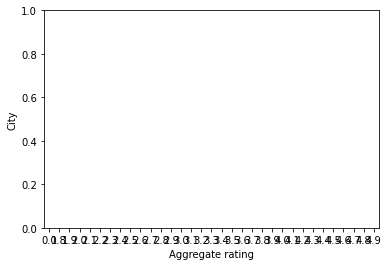

In [115]:
sns.boxplot(x="Aggregate rating",y=df["City"].value_counts()[0:5],data=df)

In [116]:
df.Country.value_counts()

India             8652
United States      434
United Kingdom      80
Brazil              60
UAE                 60
South Africa        60
New Zealand         40
Turkey              34
Australia           24
Phillipines         22
Indonesia           21
Singapore           20
Qatar               20
Sri Lanka           20
Canada               4
Name: Country, dtype: int64

In [117]:
country_names=df.Country.value_counts().index

In [124]:
country_values=df.Country.value_counts().values

Create pie chart

[]

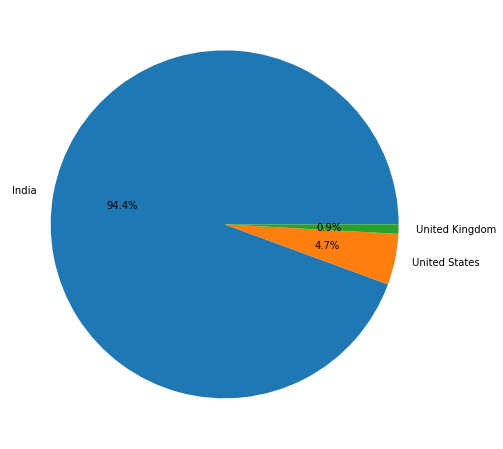

In [140]:
plt.pie(country_values[:3],labels=country_names[:3],autopct='%1.1f%%')
plt.rcParams["figure.figsize"]=8,8
plt.plot()

# Observation:
94.4% transaction is done within indian, then US and UK. Major business is happening in india  

In [141]:
df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes', 'Country'],
      dtype='object')

In [144]:
df.groupby(["Aggregate rating","Rating color","Rating text"]).size()

Aggregate rating  Rating color  Rating text
0.0               White         Not rated      2148
1.8               Red           Poor              1
1.9               Red           Poor              2
2.0               Red           Poor              7
2.1               Red           Poor             15
2.2               Red           Poor             27
2.3               Red           Poor             47
2.4               Red           Poor             87
2.5               Orange        Average         110
2.6               Orange        Average         191
2.7               Orange        Average         250
2.8               Orange        Average         315
2.9               Orange        Average         381
3.0               Orange        Average         468
3.1               Orange        Average         519
3.2               Orange        Average         522
3.3               Orange        Average         483
3.4               Orange        Average         498
3.5               Ye

In [151]:
df.groupby(["Aggregate rating","Rating color","Rating text"]).size().reset_index()

,Aggregate rating,Rating color,Rating text,0
0,0.0,White,Not rated,2148
1,1.8,Red,Poor,1
2,1.9,Red,Poor,2
3,2.0,Red,Poor,7
4,2.1,Red,Poor,15
5,2.2,Red,Poor,27
6,2.3,Red,Poor,47
7,2.4,Red,Poor,87
8,2.5,Orange,Average,110
9,2.6,Orange,Average,191


In [153]:
ratings=df.groupby(["Aggregate rating","Rating color","Rating text"]).size().reset_index().rename(columns={0:"Rating Count"})

In [154]:
ratings

,Aggregate rating,Rating color,Rating text,Rating Count
0,0.0,White,Not rated,2148
1,1.8,Red,Poor,1
2,1.9,Red,Poor,2
3,2.0,Red,Poor,7
4,2.1,Red,Poor,15
5,2.2,Red,Poor,27
6,2.3,Red,Poor,47
7,2.4,Red,Poor,87
8,2.5,Orange,Average,110
9,2.6,Orange,Average,191


# Observation

1) 4.5 to 4.9 indicates Excellent rating

2) 4.0 to 4.4 indicates Very good rating

3) 3.5 to 3.9 indicates good rating

4) 2.5 to 3.4 indicates average rating

5) 1.8 to 2.4 indicates poor rating

6) 0 indicates not rating

In [156]:
rating.sample()

,Aggregate rating,Rating color,Rating text,Rating Count
5,2.2,Red,Poor,27


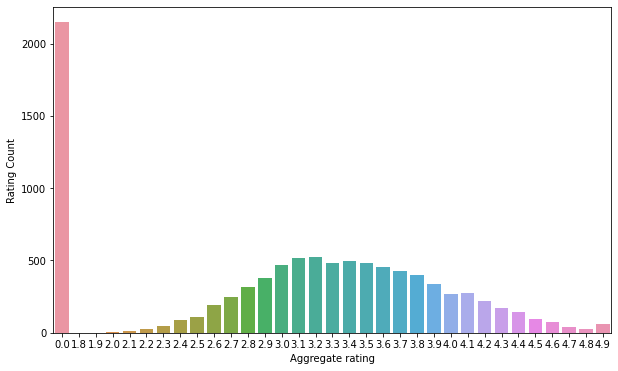

In [166]:
sns.barplot(x="Aggregate rating",y="Rating Count",data=ratings)
plt.rcParams["figure.figsize"]=10,6

<AxesSubplot:xlabel='Aggregate rating', ylabel='Rating Count'>

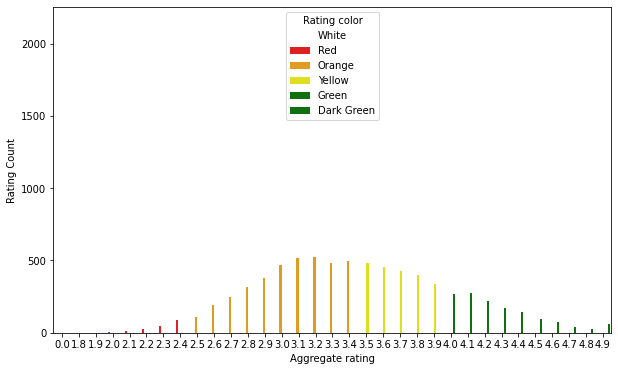

In [178]:
sns.barplot(x="Aggregate rating",y="Rating Count",hue='Rating color',data=ratings,palette=['white','red','orange','yellow','green','green'])